<a href="https://colab.research.google.com/github/UCD-Physics/Python-HowTos/blob/main/Error_Bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Analysis

In physics experiments, errors are extremely important. More information on them can be found [here](https://veritas.ucd.ie/~apl/labs_master/docs/2020/DA/Measurement_Probability_Distributions.pdf), but in this section, we will just be focusing on how to deal with them when graphing.

For this example, suppose you are doing an experiment where voltage is supposed to increase linearly with time.
Starting with importing the relevant packages and your data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

*In order to upload the sample data used in this section, run the following line of code in order to clone the UCD Physics 'how-to' repository. Then, in the 'files' section on the left hand-side of the screen, click the 'Python-HowTos' to see the drop-down of files. Lastly, drag the 'sample_data1.txt' file out of the python how-tos and drop them in order to upload them to the session storage.*

In [2]:
!git clone https://github.com/UCD-Physics/Python-HowTos

Cloning into 'Python-HowTos'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 172 (delta 58), reused 36 (delta 31), pack-reused 87
Receiving objects: 100% (172/172), 317.01 KiB | 5.98 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [3]:
volt, time = np.loadtxt('sample_data1.txt', skiprows = 1, unpack = True)

Then, plot the raw data and create a line of best fit:

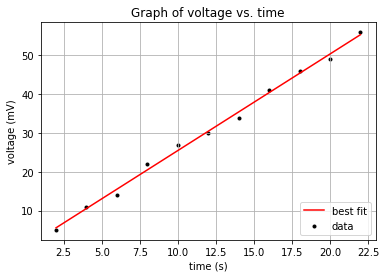

In [4]:
#plotting data
plt.scatter(time, volt, marker = '.', color = 'black', label = 'data')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Graph of voltage vs. time')
plt.grid(True)

#line of best fit

#define linear function
def func(x, m, c):
    y = m*x + c
    return y
#using curve_fit
popt, pcov = curve_fit(func, time, volt)
m = popt[0]
m_error = np.sqrt(pcov[0,0])
c = popt[1]
c_error = np.sqrt(pcov[1,1])
#plotting best fit
plt.plot(time, m*time + c, label = 'best fit', color = 'red')
plt.legend(loc = 'lower right')

At this stage, as done previously [here](https://github.com/UCD-Physics/Python-HowTos/blob/main/Curve_fit.ipynb), the best fit line gains an estimate for the slope and intercept of this line. However, these parameters and their errors can portray a more accurate reflection of the true value by including the errors on voltage and time in these calculations.

There are many aspects to errors and different ways to attain them, (as seen in link at top of page), but in this simple example we will take the error on the voltage to be +/- 1 (taken as the voltage reading was fluctuating between two values) and the error on the time to be +/- 0.1 (the accuracy of the equipment used to measure time.)

The function plt.errorbars() is used here, for more information on this function, especially that of customising size and/or colour, click [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)

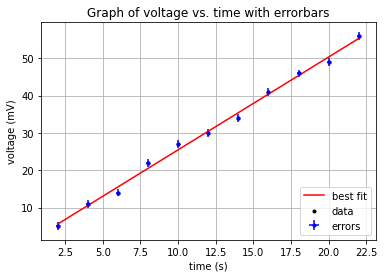

In [5]:
#first define the errors
volt_error = np.repeat(1, 11)
time_error = np.repeat(0.1, 11)

#set up the graph again
plt.scatter(time, volt, marker = '.', color = 'black', label = 'data')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Graph of voltage vs. time with errorbars')
plt.grid(True)

#then use the pyplot.errorbar() function
plt.errorbar(time, volt, yerr = volt_error, xerr = time_error, fmt = '.', color = 'blue', label = 'errors')

#using curve_fit
popt, pcov = curve_fit(func, time, volt, sigma = volt_error, absolute_sigma = True)
m1 = popt[0]
m1_error = np.sqrt(pcov[0,0])
c1 = popt[1]
c1_error = np.sqrt(pcov[1,1])
#plotting best fit
plt.plot(time, m1*time + c1, label = 'best fit', color = 'red')

plt.legend(loc = 'lower right')


In [6]:
#comparing values
print(f"The slope of the data without included errors was found to be {m:.3f} +/- {m_error:.3f} while with included errors was found to be {m1:.3f} +/- {m1_error:.3f}")
print(f"The intercept of the data without included errors was found to be {c:.3f} +/- {c_error:.3f} while with included errors was found to be {c1:.3f} +/- {c1_error:.3f}")

The slope of the data without included errors was found to be 2.491 +/- 0.057 while with included errors was found to be 2.491 +/- 0.048
The intercept of the data without included errors was found to be 0.564 +/- 0.768 while with included errors was found to be 0.564 +/- 0.647


From the values seen above, it is clear that including errors in your data greatly reduces the overall error of the slope and intercept, leading to more accurate conclusions. 